<a href="https://colab.research.google.com/github/prudhvi193/Movie-Recommendation-System-using-Collaborative-Filtering-and-Latent-Factor-Model/blob/main/LF%2BBiases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Project-4 / Group-12***

#### ***Name : Prudhviraj Sheela | OSU CWID : A20228857***

#### ***Name : Aman Masipeddi | OSU CWID : A20198116***

#### **Bonus Task**

***Latent Factor Model (LF) + Biases***

In [ ]:
# Required dependencies of the Latent Factor Model + Biases of User and Items Program
import numpy as np
import pandas as pd
import math
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import csv

***Loading of input training data file and creation of dataframe*** 


In [ ]:
input_train = "/content/training_dataset.csv" # Loading the input training file
read_data = pd.read_csv(input_train) # Creating a data frame for the input training data loaded
no_users = read_data['user_id'].max() # Stroing the count of users
no_items = read_data['item_id'].max() # Storing the count of items

***Initializing the P and Q matrices***

In [ ]:
k = 25 # Given value of K
lamda = 0.1 # Given value of λ (Here I have considered λ1, λ2, λ3, λ4 as the same value for all the L2 norms Qi,Px,Bx,Bi)
mu = 0.01 # Given value of μ
algo_iterations = 40 # Given number of algorithm iterations
maximum = np.sqrt(5/k) # Maximum size of P and Q's range as given
user_bias = np.zeros((no_users,),dtype=np.float32) # Initalized User Bias Matrix
item_bias = np.zeros((no_items,),dtype=np.float32) # Initialized Item Bias Matrix
P = np.random.uniform(0,maximum,(k, no_users)) # Initialized P matrix within the given range of [0,sqrt(5/k)]
Q = np.random.uniform(0,maximum,(k, no_items)) # Initialized Q matrix within the given range of [0,sqrt(5/k)]
Error_func = np.zeros((algo_iterations,2)) # This stores the associated error function for each iteration

***Computing Error functions using Stochastic Gradient 
Descent (SGD) and Biases***

In [ ]:
# Below is the process of computing Stochastic Gradient Descent (SGD) + Biases for Users and Items
for iter in range(algo_iterations): # Loading the iterations
  with open(input_train) as fi: # Accessing the contents of file from disk
    c1 = 0
    c2 = 0
    Px = 0 # Normalization Variable corresponding to users
    Qi = 0 # Normalization Variable corresponding to users
    Bx = 0 # Normalization Variable corresponding to user bias
    Bi = 0 # Normalization Variable corresponding to item bias
    Err = 0 # This stores the final Error function value for the corresponding iteration
    
    # In the below "for" loop we obtain the final P and Q matrices associated to that particular iteration
    for line in fi: # Iterating through each entry of the file
      l = line.split(',') # Obtaining each parameters of that particular row by splitting them
      if c1 > 0: # Initially it skips the header and then the computation starts from the first row
        user = int(l[0])-1 # Loading each row's user id
        item = int(l[1])-1 # Loading each row's item id
        rating = int(l[2]) # Loading each row's rating
        err = rating - (mu + user_bias[user] + item_bias[item] + sum(Q[:,item] * P[:,user])) # Computing the initial error value associated for each row entry for the corresponding iteration 
        user_bias[user] += mu * (err - lamda * user_bias[user]) # Updating the value of each user in the user_bias
        item_bias[user] += mu * (err - lamda * item_bias[user]) # Updating the values of corresponding item in the item_bias
        P[:,user] += mu * (err * Q[:,item] - lamda * P[:,user]) # Updating the P matrix according to the formula in SGD
        Q[:,item] += mu * (err * P[:,user] - lamda * Q[:,item]) # Updating the Q matrix according to the formula in SGD
      c1 += 1 # Incrementing the count and iterating through next row in the file
    
    # In the below "for" loop once the P and Q matrices are obtained and are fixed, we calculate the Error function now based on these values
    for line in fi: # Iterating through each entry of the file
      l = line.split(',') # Obtaining each parameters of that particular row by splitting them
      if c2 > 0: # Initially it skips the header and then the computation starts from the first row
        user = int(l[0]) - 1 # Loading each row's user id
        item = int(l[1])-1 # Loading each row's item id
        rating = int(l[2]) # Loading each row's rating
        Err += pow((rating - (mu + user_bias[user] + item_bias[item] + sum(Q[:,item] * P[:,user]))),2) # We update the initial term of the error function obtained now based on the P and Q values which are fixed for each user and item
      c2 += 1 # Incrementing the count and iterating through next row in the file
    
    # In the below for loop we find the value of [(||Px||)^2] value which is the square of L2 norm for Users
    for a in range(len(P)):
      Px += pow(norm(P[:,a]),2)

    # In the below for loop we find the value of [(||Qi||)^2] value which is the square of L2 norm for Items
    for b in range(len(Q)):
      Qi += pow(norm(Q[:,b]),2)

    # In the below for loop we find the value of [(||Bx||)^2] value which is the square of L2 norm for User Bias
    for c in range(len(user_bias)):
      Bx += pow(norm(user_bias[c]),2)

    # In the below for loop we find the value of [(||Bi||)^2] value which is the square of L2 norm for Item Bias
    for d in range(len(item_bias)):
      Bi += pow(norm(item_bias[d]),2)
    
    # Below  is the error function formula for calculating the Latent Factor Model + Biases Model
    Err += Err + lamda*(Px+Qi+Bx+Bi) # The final error function is obtained at the end of each iteration by substituting all the above computed values
    Err = round(Err,2) # Rounding the value of error to "2" decimal places
    Error_func[iter,:] = np.array([iter+1, Err]) # Updating the Error function array with its iteration number and error value
  print("Error function for iteration number",iter+1,"and its value is",Err) # Prints the results of error function associated with respect to each iteration


Error function for iteration number 1 and its value is 47.21
Error function for iteration number 2 and its value is 56.62
Error function for iteration number 3 and its value is 64.37
Error function for iteration number 4 and its value is 71.18
Error function for iteration number 5 and its value is 77.39
Error function for iteration number 6 and its value is 83.15
Error function for iteration number 7 and its value is 88.54
Error function for iteration number 8 and its value is 93.61
Error function for iteration number 9 and its value is 98.39
Error function for iteration number 10 and its value is 102.9
Error function for iteration number 11 and its value is 107.17
Error function for iteration number 12 and its value is 111.21
Error function for iteration number 13 and its value is 115.04
Error function for iteration number 14 and its value is 118.65
Error function for iteration number 15 and its value is 122.08
Error function for iteration number 16 and its value is 125.33
Error funct

***Graph plotted between Error function (E) and No.of Algorithm Iterations***

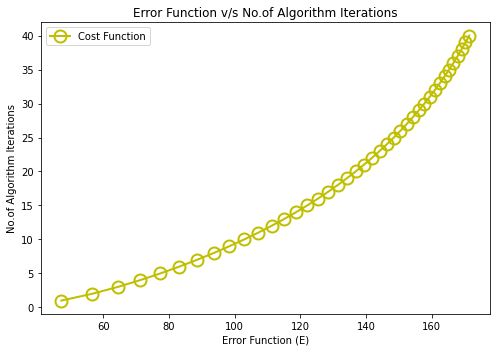

In [ ]:
# Below we have plotted the line plot between Error Function (E) v/s Number of Algorithm Iterations
import matplotlib as mplib
import matplotlib.pyplot as plt
figure, axes = plt.subplots(1,1,figsize=(7,5)) # Specifying the dimensions of graph

# In the below step we assign a line plot for the iteration and its associated error function

axes.plot(Error_func[:,1], Error_func[:,0], 'yo-', linewidth = 2, markersize = 12, markeredgewidth = 2, label = 'Cost Function', fillstyle = 'none')
axes.set_xlabel("Error Function (E)") # Setting the x-label to Error Function
axes.set_ylabel("No.of Algorithm Iterations") # Setting the y-label to number of algorithm iterations
axes.set_title("Error Function v/s No.of Algorithm Iterations") # Setting the title
axes.legend(loc=0) 
figure.tight_layout() # Adjusts the graph to a tight layout
plt.show() # Displays the plot

***Rating Predictions and Model Evaluation with Test Data***

In [ ]:
input_test = '/content/test_dataset.csv' # Loading the test data for model evaluation
orig_rating = [] # List for stroing original ratings from the test dataset
predicted_rating = [] # List for stroing the predicted rating obtained from training dataset
with open(input_test) as fi: # Accessing the test dataset content
  c = 0
  for line in fi: # Iterating through each row of the test dataset and find their associate original and predicted ratings
    l = line.split(',') # Splits each rows details into a list
    if c > 0: # Initially it skips the header and then the computation starts from the first row
      user = int(l[0])-1 # Loading the user details
      item = int(l[1])-1 # Loading the item details 
      orig_rating.append(int(l[2])) # Appends the original rating present in the test dataset
      predicted_rating.append((mu + user_bias[user] + item_bias[item] + np.dot(Q[:,item],P[:,user]))) # Appends the predicted rating obtained from the rating formula used of Latent Factor Model + Biases
    c += 1 # Incrementing through each row of the test file

***Computation of RMSE***

In [ ]:
# Below we get the RMSE value associated for the actual(original) and predicted ratings
def RMSE(y_actual, y_predicted):
  rms = sqrt(mean_squared_error(y_actual, y_predicted)) # Final RMSE value is computed for both the rating lists
  return round(rms,4)
rmse_lf = RMSE(orig_rating, predicted_rating) # Pass both the ratings to RMSE function
print("RMSE obtained for latent factor model + Biases is ", rmse_lf) # Root mean squared error for "lf" is resulted

RMSE obtained for latent factor model + Biases is  0.8888


***Error Function Formula for LF+Biases Model:***

Rating = μ + bx + bi + (q(i)*p(x))

Error_Function = 

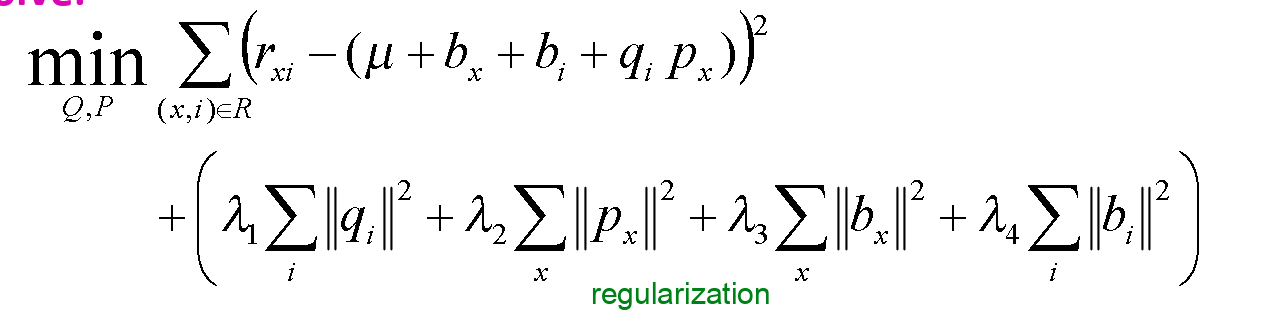

***Comparing thre RMSE Scores between LF and LF+Bias Models:***

***I) RMSE Score obtained for LF.py:***

a) RMSE for Latent Factor Model = 0.8947

***II) RMSE Score obtained for LF+Biases.py:***

a) RMSE for Laten Factor Model + Bias = 0.8921

--> As an extension to the previous Latent Factor Model, we have added the bias pairs of movies and users to the Latent Factor Model and tried to predict the ratings and RMSE Score associated with the model.

--> From the observation of above RMSE Scores obtained in the two programs, it is clear that (LF+Bias) Model has a reduced error rate and better performance compared to the (LF) Model.

--> So, the advantage of using bias model (baseline predictor) with latent factor is to provide a better user-movie interaction and it helps in characterizing the matchings associated with both user and the movie. Also, this algorithm helps in providing much higher optimizations comparatively.

